In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
data=pd.read_csv('../Case-Study/Dataset/startup_funding.csv')

In [3]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [8]:
## Cleaning the City Feature
data['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
data['CityLocation']=data['CityLocation'].apply(separateCity)
data['CityLocation'].replace("Delhi","New Delhi",inplace=True)
data['CityLocation'].replace("bangalore","Bangalore",inplace=True)

In [9]:
## Labelling the New Delhi,Gurgaon,Noida to NCR
data['CityLocation'].replace("New Delhi","NCR",inplace=True)
data['CityLocation'].replace('Gurgaon','NCR',inplace=True)
data['CityLocation'].replace('Noida','NCR',inplace=True)

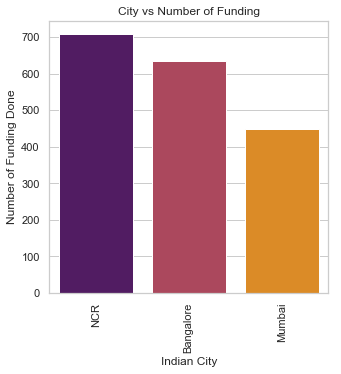

In [10]:
## Ploting the City vs Number of funding done 
plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
sns.countplot(data['CityLocation'],palette='inferno',order=data['CityLocation'].value_counts().index[0:3])
plt.xticks(rotation=90)
plt.title('City vs Number of Funding')
plt.ylabel("Number of Funding Done")
plt.xlabel("Indian City")
plt.show()